# Models for Credit Card Fraud Detection (classification)

In [2]:
import pandas as pd
import numpy as np
import keras

np.random.seed(100)
data = pd.read_csv('../Dataset/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
X.shape, y.shape, X_train.shape, X_test.shape

((284807, 29), (284807, 1), (199364, 29), (85443, 29))

## 1). Decision trees

In [6]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train.values.ravel())
y_pred_1 = decision_tree.predict(X_test)
decision_tree.score(X_test, y_test)

0.9992977774656788

In [7]:
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85273    23]
 [   37   110]]


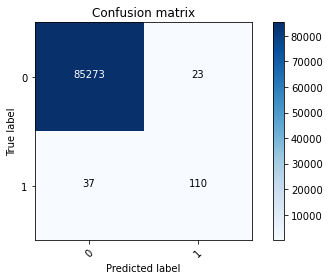

In [8]:
cnf_matrix_1 = confusion_matrix(y_test, y_pred_1)
plot_confusion_matrix(cnf_matrix_1, classes=[0,1])
plt.show()

In [9]:
# y_pred_11 = decision_tree.predict(X)
# y_expected_11 = pd.DataFrame(y)
# cnf_matrix_11 = confusion_matrix(y_expected_11, y_pred_11.round())
# plot_confusion_matrix(cnf_matrix_11, classes=[0,1])
# plt.show()

## 2). Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())

y_pred_2 = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9995435553526912

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


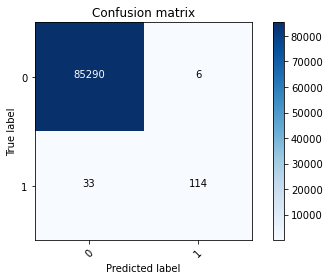

In [12]:
cnf_matrix_2 = confusion_matrix(y_test,y_pred_2)
plot_confusion_matrix(cnf_matrix_2, classes=[0,1])
plt.show()

In [13]:
# y_pred_22 = random_forest.predict(X)
# y_expected_22 = pd.DataFrame(y)
# cnf_matrix_22 = confusion_matrix(y_expected_22, y_pred_22.round())
# plot_confusion_matrix(cnf_matrix_22, classes=[0,1])
# plt.show()

##  3). Xgboost model

In [14]:
!pip install xgboost
from xgboost import XGBClassifier

model_3 = XGBClassifier(learning_rate = 0.01, n_estimators=500, max_depth=20)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
print(y_pred_3)

C:\Users\Sealion\AppData\Local\Continuum\anaconda3\envs\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Sealion\AppData\Local\Continuum\anaconda3\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 0 0 0]


Confusion matrix, without normalization
[[85289     7]
 [   32   115]]


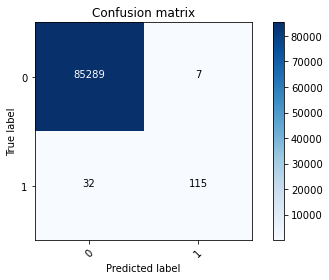

In [15]:
cnf_matrix_3 = confusion_matrix(y_test, y_pred_3.round())
plot_confusion_matrix(cnf_matrix_3, classes=[0,1])
plt.show()

## 4). Deep neural network

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364, 1), (85443, 1))

In [18]:
model_4 = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [19]:
# Train model
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_4.fit(X_train, y_train, batch_size=15, epochs=15)

Epoch 1/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0089 - accuracy: 0.9988
Epoch 2/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 3/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 4/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 6/15
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 7/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 8/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 9/15
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 10/15
13291/13291 [==============================

In [20]:
score_4 = model_4.evaluate(X_test, y_test)
print(score_4)

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9994
[0.003920510411262512, 0.9993796944618225]


Confusion matrix, without normalization
[[85274    22]
 [   31   116]]


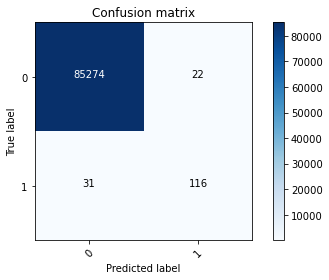

In [21]:
y_pred_4 = model_4.predict(X_test)
y_test = pd.DataFrame(y_test)

cnf_matrix_4 = confusion_matrix(y_test, y_pred_4.round())
plot_confusion_matrix(cnf_matrix_4, classes=[0,1])
plt.show()

In [22]:
# y_pred_44 = model_4.predict(X)
# y_expected_44 = pd.DataFrame(y)
# cnf_matrix_44 = confusion_matrix(y_expected_44, y_pred_44.round())
# plot_confusion_matrix(cnf_matrix_44, classes=[0,1])
# plt.show()

## 5). Undersampling

In [23]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [24]:
normal_indices = data[data.Class == 0].index
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [25]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [26]:
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X_undersample, y_undersample, test_size=0.3)
X_train_un = np.array(X_train_un)
X_test_un = np.array(X_test_un)
y_train_un = np.array(y_train_un)
y_test_un = np.array(y_test_un)

In [28]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [36]:
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_4.fit(X_train_un, y_train_un, batch_size=15, epochs=15)

Epoch 1/15
46/46 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.9026
Epoch 2/15
46/46 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9099
Epoch 3/15
46/46 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9142
Epoch 4/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9201
Epoch 5/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9201
Epoch 6/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9302
Epoch 7/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9375
Epoch 8/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9404
Epoch 9/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9433
Epoch 10/15
46/46 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9433
Epoch 11/15
46/46 [

Confusion matrix, without normalization
[[145   1]
 [ 16 134]]


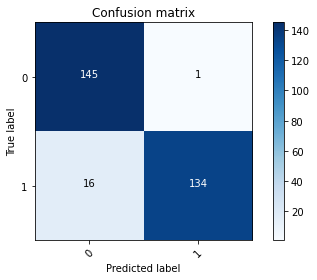

In [37]:
y_pred_un = model_4.predict(X_test_un)
y_expected_un = pd.DataFrame(y_test_un)
cnf_matrix_un = confusion_matrix(y_expected_un, y_pred_un.round())
plot_confusion_matrix(cnf_matrix_un, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283774    541]
 [    48    444]]


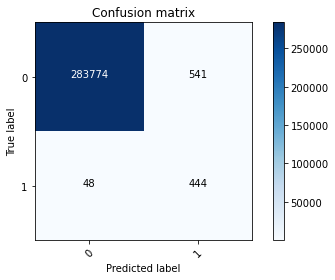

In [38]:
y_pred = model_4.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## 6). SMOTE (oversampling technique)

In [43]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resample,y_resample,test_size=0.3)

X_train_over = np.array(X_train_over)
X_test_over = np.array(X_test_over)
y_train_over = np.array(y_train_over)
y_test_over = np.array(y_test_over)

In [44]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [45]:
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_4.fit(X_train_over, y_train_over, batch_size=15, epochs=15)

Epoch 1/15
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 2/15
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0115 - accuracy: 0.9972
Epoch 3/15
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0093 - accuracy: 0.9978
Epoch 4/15
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0081 - accuracy: 0.9982
Epoch 5/15
26537/26537 [==============================] - 62s 2ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 6/15
26537/26537 [==============================] - 62s 2ms/step - loss: 0.0072 - accuracy: 0.9984
Epoch 7/15
26537/26537 [==============================] - 62s 2ms/step - loss: 0.0072 - accuracy: 0.9984
Epoch 8/15
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0071 - accuracy: 0.9985
Epoch 9/15
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0069 - accuracy: 0.9985
Epoch 10/15
26537/26537 [==============================

Confusion matrix, without normalization
[[85194   172]
 [   18 85205]]


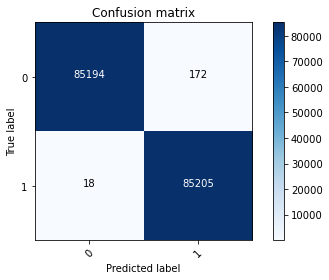

In [47]:
y_pred_over = model_4.predict(X_test_over)
y_expected_over = pd.DataFrame(y_test_over)
cnf_matrix_over = confusion_matrix(y_expected_over, y_pred_over.round())
plot_confusion_matrix(cnf_matrix_over, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283799    516]
 [     4    488]]


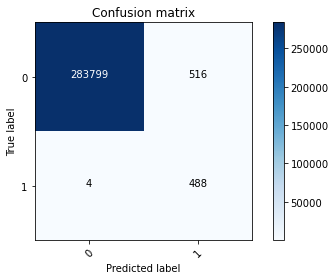

In [48]:
y_pred = model_4.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()